## Using Tensorflow

Epoch 1/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6264 - accuracy: 0.9192 - val_loss: 0.3557 - val_accuracy: 0.9605
Epoch 2/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3842 - accuracy: 0.9448 - val_loss: 0.3036 - val_accuracy: 0.9674
Epoch 3/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3590 - accuracy: 0.9487 - val_loss: 0.3014 - val_accuracy: 0.9635
Epoch 4/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3432 - accuracy: 0.9503 - val_loss: 0.3026 - val_accuracy: 0.9608
Epoch 5/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3286 - accuracy: 0.9518 - val_loss: 0.2627 - val_accuracy: 0.9708
Epoch 6/50
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3235 - accuracy: 0.9515 - val_loss: 0.2703 - val_accuracy: 0.9656
Epoch 7/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3178 - accuracy: 0.9525 - val_loss: 0.2530 - val_

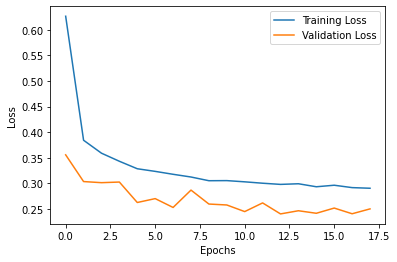

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a model with Dropout and L2 Regularization
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),  # L2 Regularization
    Dropout(0.3),  # Dropout layer to reduce overfitting
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),  # L2 Regularization
    Dropout(0.3),  # Dropout layer
    Dense(10, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with Early Stopping
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy vs Validation accuracy
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

## Prediction

In [ ]:
import numpy as np
# Prediction

single_image = x_test[0].reshape(1,28,28)
single_prediction = model.predict(single_image)
predicted_class = np.argmax(single_prediction)

print(predicted_class)


In [ ]:
plt.imshow(x_test[0],cmap='gray')

## Using Pytorch

/home/suhas/master_dataklout/venv/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Failed to download (trying next):
HTTP Error 404: Not Found



9913344it [00:12, 825228.54it/s]                              


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



29696it [00:00, 119681.58it/s]                          


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



1649664it [00:03, 482851.19it/s]                             


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



5120it [00:00, 1282003.25it/s]          


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1: Train Loss: 0.4389, Train Acc: 0.8640, Val Loss: 0.2118, Val Acc: 0.9357
Epoch 2: Train Loss: 0.2371, Train Acc: 0.9277, Val Loss: 0.1516, Val Acc: 0.9525
Epoch 3: Train Loss: 0.1944, Train Acc: 0.9406, Val Loss: 0.1189, Val Acc: 0.9627
Epoch 4: Train Loss: 0.1719, Train Acc: 0.9474, Val Loss: 0.1185, Val Acc: 0.9638
Epoch 5: Train Loss: 0.1604, Train Acc: 0.9502, Val Loss: 0.1031, Val Acc: 0.9690
Epoch 6: Train Loss: 0.1480, Train Acc: 0.9536, Val Loss: 0.0959, Val Acc: 0.9688
Epoch 7: Train Loss: 0.1413, Train Acc: 0.9554, Val Loss: 0.0907, Val Acc: 0.9717
Epoch 8: Train Loss: 0.1346, Train Acc: 0.9584, Val Loss: 0.1008, Val Acc: 0.9684
Epoch 9: Train Loss: 0.1280, Train Acc: 0.9595, Val Loss: 0.0948, Val Acc: 0.9699
Epoch 10: Train Loss: 0.1251, Train Acc: 0.9619, Val Loss: 0.1021, Val Acc: 0.9695
Early stopping triggered.


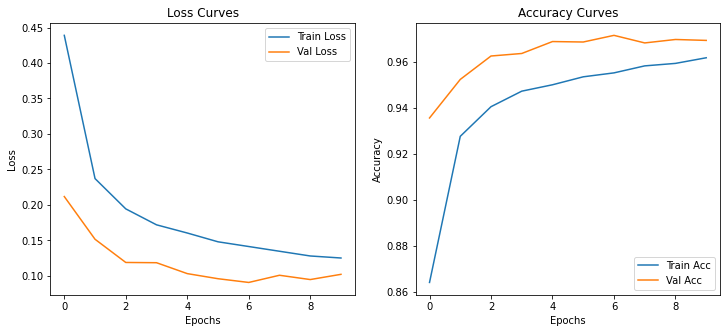

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Data Preparation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Model Definition
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 10)
        )
    
    def forward(self, x):
        return self.model(x)

model = ANN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # L2 Regularization

# Training Loop
best_val_loss = float('inf')
patience = 3
patience_counter = 0
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

for epoch in range(20):
    model.train()
    total_loss, correct, total = 0, 0, 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        images = images.view(images.size(0), -1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    
    train_losses.append(total_loss / len(train_loader))
    train_accuracies.append(correct / total)
    
    # Validation Loop
    model.eval()
    val_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            images = images.view(images.size(0), -1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    
    val_losses.append(val_loss / len(test_loader))
    val_accuracies.append(correct / total)
    
    print(f"Epoch {epoch+1}: Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, "
          f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}")
    
    if val_losses[-1] < best_val_loss:
        best_val_loss = val_losses[-1]
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

# Plot Results
epochs = len(train_losses)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label='Train Loss')
plt.plot(range(epochs), val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracies, label='Train Acc')
plt.plot(range(epochs), val_accuracies, label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()
